In [66]:
import numpy as np
import gym

map_8x8 = [
    'SFFFFFFF',
    'FFFFFFFF',
    'FFFHFFFF',
    'FFFFFHFF',
    'FFFHFFFF',
    'FHHFFFHF',
    'FHFFHFHF',
    'FFFHFFFG'
]

map_10x10 = [
    'SFFFFFFFFF',
    'FFFFFFFFFF',
    'FFFHFFFFFF',
    'FFFFFFFFFF',
    'FFFFFFFFFH',
    'FFFHFFFFFF',
    'FFFFFFFFFF',
    'FFFFFHFFFF',
    'FFFFFFFHFF',
    'FFFFFFFFFG'
]

#"4x4"
env = gym.make('FrozenLake-v1', desc=map_10x10, is_slippery=True, render_mode="human")


action_size = env.action_space.n
state_size = env.observation_space.n
gamma = 0.99

# print(action_size)
#env.reset()
#env.render()

# randomAction= env.action_space.sample()
# returnValue = env.step(randomAction)
# #env.P[0][1]

transition_matrix = np.zeros((state_size, action_size, state_size)) # T -> SxAxS


for state in range(state_size):
    for action in range(action_size):
        for transition in env.P[state][action]:
            prob, next_state, _, _ = transition
            transition_matrix[state, action, next_state] += prob

In [67]:
print(transition_matrix)
print(transition_matrix.shape)

[[[0.66666667 0.         0.         ... 0.         0.         0.        ]
  [0.33333333 0.33333333 0.         ... 0.         0.         0.        ]
  [0.33333333 0.33333333 0.         ... 0.         0.         0.        ]
  [0.66666667 0.33333333 0.         ... 0.         0.         0.        ]]

 [[0.33333333 0.33333333 0.         ... 0.         0.         0.        ]
  [0.33333333 0.         0.33333333 ... 0.         0.         0.        ]
  [0.         0.33333333 0.33333333 ... 0.         0.         0.        ]
  [0.33333333 0.33333333 0.33333333 ... 0.         0.         0.        ]]

 [[0.         0.33333333 0.33333333 ... 0.         0.         0.        ]
  [0.         0.33333333 0.         ... 0.         0.         0.        ]
  [0.         0.         0.33333333 ... 0.         0.         0.        ]
  [0.         0.33333333 0.33333333 ... 0.         0.         0.        ]]

 ...

 [[0.         0.         0.         ... 0.33333333 0.         0.        ]
  [0.         0.         0

In [73]:
# Define a random policy where every action has an equal probability
policy = np.ones((state_size, action_size)) / action_size

#policy = np.zeros((state_size, action_size))
#policy[:,0] = 1
#print(policy)

# Calculate the state transition probabilities under policy pi
P_pi = np.sum(policy[:, :, None] * transition_matrix, axis=1)

# Define the initial state distribution (assuming always starting from the first state)
s0 = np.zeros(state_size)
s0[0] = 1.0  # start from the first state

# Calculate the expected state visitation frequency
visitation_frequency = (1 - gamma) * np.dot(np.linalg.inv(np.eye(state_size) - gamma * P_pi), s0)

print(visitation_frequency)
print(sum(visitation_frequency))

[ 4.63081103e-02  2.69099209e-02  1.58791801e-02  9.13452889e-03
  5.57380210e-03  3.64723827e-03  2.53949050e-03  1.87577691e-03
  1.48822223e-03  1.30592291e-03  2.71732941e-02  1.96297418e-02
  1.22346736e-02  6.31967632e-03  4.16484327e-03  2.97578536e-03
  2.19806201e-03  1.67540698e-03  1.34309705e-03  1.17638816e-03
  1.66799410e-02  1.29941997e-02  7.60442629e-03  1.49483238e-17
  1.95838578e-03  2.01323167e-03  1.69037576e-03  1.35238515e-03
  1.08663736e-03  9.27675367e-04  1.05462662e-02  8.58770770e-03
  5.49608145e-03  2.23779325e-03  1.73459489e-03  1.50972245e-03
  1.26612224e-03  1.01176234e-03  7.67296409e-04  5.57482411e-04
  6.79726179e-03  5.66126155e-03  3.77646244e-03  1.81091256e-03
  1.30256273e-03  1.08593990e-03  9.03784852e-04  7.02124849e-04
  4.44305399e-04  1.56031867e-18  4.45889442e-03  3.71235209e-03
  2.29017854e-03  4.85406832e-18  6.31432364e-04  6.71565921e-04
  5.97468979e-04  4.77015485e-04  3.25752072e-04  1.62977476e-04
  3.04722672e-03  2.58906

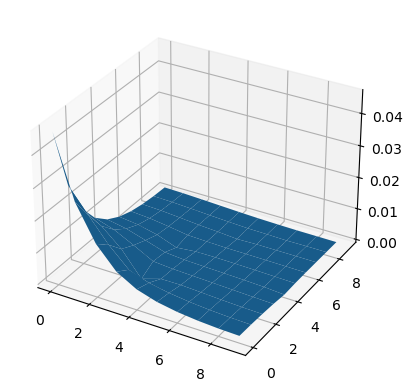

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Create X, Y coordinates
x = np.arange(int(np.sqrt(state_size)))
y = np.arange(int(np.sqrt(state_size)))
X, Y = np.meshgrid(x, y)

# Reshape visitation frequencies to a 2D grid
Z = visitation_frequency.reshape((int(np.sqrt(state_size)), int(np.sqrt(state_size))))

# Plot a 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

plt.show()